# Importing needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
data = keras.datasets.fashion_mnist.load_data()

# Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [3]:
(x_train, y_train),(x_test, y_test) = data

In [4]:
print(f"training set:\n{x_train.shape, y_train.shape}")

training set:
((60000, 28, 28), (60000,))


In [5]:
print(f"testing set:\n{x_test.shape, y_test.shape}")

testing set:
((10000, 28, 28), (10000,))


In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

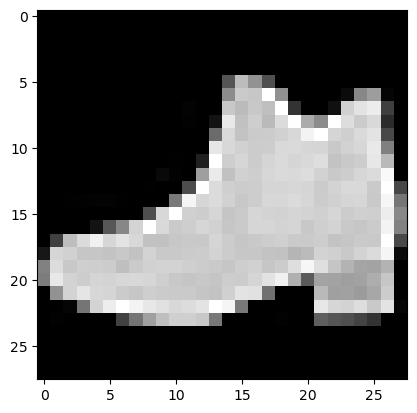

In [7]:
plt.imshow(x_train[15],cmap="gray");

# Normalizing the data 

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [10]:
x_train.shape

(60000, 28, 28)

# Creating the model

In [11]:
model = Sequential(
    [
        Flatten(input_shape=[28,28]), # input layer
        Dense(units=100, activation="relu"), # first hidden layer
        Dense(units=75, activation="relu"), # second hidden layer
        Dense(units=10, activation="softmax") # output layer
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
weight, bias = model.layers[1].get_weights()

In [15]:
weight

array([[-0.03957863, -0.00941835, -0.08016577, ...,  0.0418168 ,
        -0.05412688, -0.01504885],
       [ 0.04103073, -0.06215568,  0.01837318, ...,  0.05349521,
         0.00341786,  0.05245394],
       [ 0.02993762, -0.00736696,  0.06880589, ..., -0.02791996,
         0.01924617, -0.02310723],
       ...,
       [ 0.04721728, -0.06574097, -0.04363776, ...,  0.06315772,
        -0.05829433,  0.02066359],
       [ 0.03430367, -0.04752377,  0.0764707 , ..., -0.07170651,
        -0.0623007 ,  0.0751591 ],
       [ 0.07659437,  0.06486991,  0.08037136, ...,  0.06151761,
        -0.03084497,  0.03959264]], dtype=float32)

In [16]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compiling and Fitting the model

In [17]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]

)

In [18]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8070 - accuracy: 0.7281 - val_loss: 0.5436 - val_accuracy: 0.8150
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5151 - accuracy: 0.8209 - val_loss: 0.5002 - val_accuracy: 0.8242
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4667 - accuracy: 0.8367 - val_loss: 0.4668 - val_accuracy: 0.8297
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4401 - accuracy: 0.8454 - val_loss: 0.4498 - val_accuracy: 0.8393
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4183 - accuracy: 0.8528 - val_loss: 0.4680 - val_accuracy: 0.8397
Epoch 6/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4037 - accuracy: 0.8582 - val_loss: 0.4195 - val_accuracy: 0.8520
Epoch 7/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3902 - accuracy: 0.8626 - val_loss: 0.3944 - val_accuracy:

In [19]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1688}

In [21]:
print(history.history)

{'loss': [0.8070045709609985, 0.5151335597038269, 0.4666902720928192, 0.44008806347846985, 0.41833969950675964, 0.40370315313339233, 0.3901575803756714, 0.3779674172401428, 0.36885300278663635, 0.3596811592578888, 0.3511279225349426, 0.3438732624053955, 0.33621740341186523, 0.3298375606536865, 0.32380518317222595, 0.31824085116386414, 0.3122953474521637, 0.30720192193984985, 0.3025304675102234, 0.2970678210258484, 0.29286834597587585, 0.2893788516521454, 0.285310298204422, 0.2806806266307831, 0.27678683400154114, 0.27449357509613037, 0.2715010941028595, 0.26699942350387573, 0.2645278573036194, 0.26029491424560547, 0.2577511668205261, 0.2542918026447296, 0.25110292434692383, 0.2478552907705307, 0.24583439528942108, 0.2423761785030365, 0.23947252333164215, 0.23664118349552155, 0.2358291745185852, 0.23131844401359558, 0.22839879989624023, 0.22620144486427307, 0.22394190728664398, 0.22184477746486664, 0.21919851005077362, 0.21689608693122864, 0.21436798572540283, 0.21168527007102966, 0.209

# Visualizing the losses and accuracies

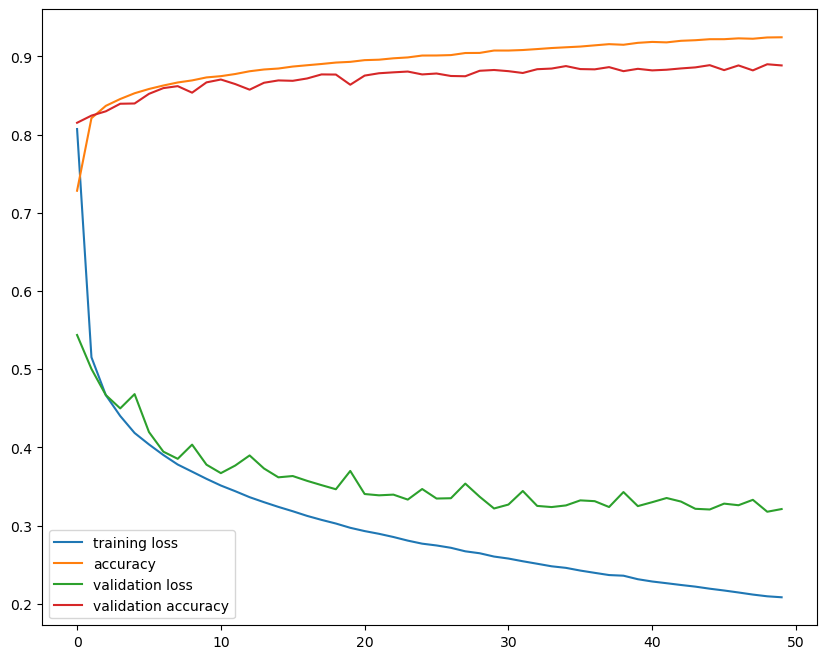

In [24]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(history.history["loss"], label="training loss");
ax.plot(history.history["accuracy"], label="accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [28]:
eval = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8828


In [29]:
print(f"loss: {eval[0]}")
print(f"accuracy: {eval[1]}")

loss: 0.33410879969596863
accuracy: 0.8827999830245972


# Prediction

In [31]:
x3 = x_test[1:3]

In [33]:
x3.shape

(2, 28, 28)

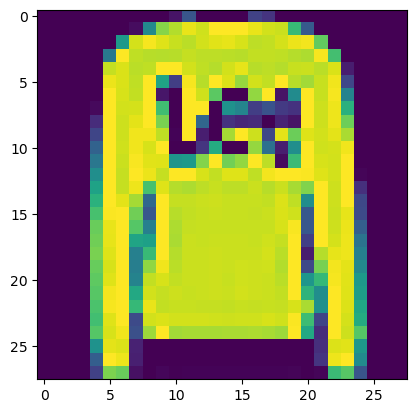

In [35]:
plt.imshow(x3[0]);

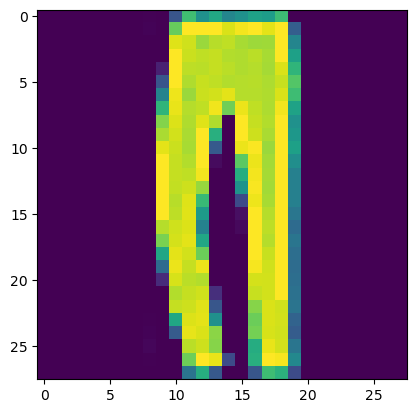

In [36]:
plt.imshow(x3[1]);

In [38]:
model.predict(x3)

1/1 [==============================] - 0s 81ms/step


array([[3.3402796e-06, 2.6315371e-08, 9.9659449e-01, 5.8318594e-10,
        3.3409952e-03, 2.6412015e-12, 6.1227431e-05, 1.2698240e-13,
        1.4920065e-09, 8.1160603e-14],
       [1.3200265e-07, 9.9999976e-01, 1.2116010e-10, 1.6048306e-08,
        8.6764430e-08, 5.4790821e-14, 3.2500777e-10, 2.0700540e-12,
        1.9034783e-10, 3.8319036e-13]], dtype=float32)

In [40]:
model.predict(x3).shape 
#1/1 [==============================] - 0s 15ms/step
#(2, 10) 2 rows for 2 predictions and 10 columns for 10 outputs

1/1 [==============================] - 0s 17ms/step


(2, 10)

In [44]:
np.argmax(model.predict(x3).round(),  axis=1)

1/1 [==============================] - 0s 18ms/step


array([2, 1], dtype=int64)

# Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot